# Project5: Niraj



- [Problem Statement](#Problem-Statement)
- [Summary](#Summary)
- [Data Dictionary](#Data-Dictionary)


#### Precrash data analysis: PC 1-23
Included in vehicle.csv plus other files. 

Also accident related

**Main areas** :
1. Create categories for the 99 Precrash events for better visualizations
2. Create date_time index for accident
3. Create 3 hour (and 2 hour and 4 hour) windows since these are the 'seasonality frequencies' for accidents and especially drunk drivers. 
4. Do EDA on pre-crash factors


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
folder = "FARS2020NationalCSV/"

df_vehicle = pd.read_csv("./data/" + folder + "VEHICLE.CSV")
#df_person = pd.read_csv("./data/" + folder + "PERSON.CSV")
df_vision = pd.read_csv("./data/" + folder + "VISION.CSV")
df_distract = pd.read_csv("./data/" + folder + "DISTRACT.CSV")
df_maneuver = pd.read_csv("./data/" + folder + "maneuver.CSV")
df_weather = pd.read_csv("./data/" + folder + "weather.CSV")
#df_accident = pd.read_csv("./data/" + folder + "accident.CSV") # accident is done for multiple years
df_factor = pd.read_csv("./data/" + folder + "factor.CSV")


# Get accident data for all years
folderFARS = "FARS" 
folderType = "NationalCSV/"

df_accident = pd.DataFrame()

for i in range( 2010, 2021):   
    folder_name = folderFARS + str(i) + folderType
    print(i, folder_name)
    df_accident = df_accident.append(pd.read_csv("./data/" + folder_name + "accident.CSV"))


# Make column names lowercase
df_vehicle.columns = df_vehicle.columns.str.lower()
df_vision.columns = df_vision.columns.str.lower()
df_distract.columns = df_distract.columns.str.lower()
df_maneuver.columns = df_maneuver.columns.str.lower()
df_weather.columns = df_weather.columns.str.lower()
df_accident.columns = df_accident.columns.str.lower()
df_factor.columns = df_factor.columns.str.lower()


/Users/sarniraj/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (14,56,58,179,181) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


2010 FARS2010NationalCSV/
2011 FARS2011NationalCSV/
2012 FARS2012NationalCSV/
2013 FARS2013NationalCSV/
2014 FARS2014NationalCSV/
2015 FARS2015NationalCSV/
2016 FARS2016NationalCSV/
2017 FARS2017NationalCSV/


/Users/sarniraj/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (40,42) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


2018 FARS2018NationalCSV/
2019 FARS2019NationalCSV/
2020 FARS2020NationalCSV/


In [3]:
# Check all years are showing
df_accident['year'].value_counts()

2020    35766
2016    34748
2017    34560
2018    33919
2019    33487
2015    32538
2012    31006
2010    30296
2013    30202
2014    30056
2011    29867
Name: year, dtype: int64

In [5]:
# Reset index to sort across all years
df_accident.reset_index(drop=True, inplace=True)


In [6]:
# Keep only required columns from accident to conserve space, memory, time
# C7, C17, C18, 19, C20, C24-C30...: 47 columns

accident_cols = [ 'YEAR', "MONTH", "MONTHNAME", "DAY", "DAY_WEEK", "DAY_WEEKNAME", "HOUR", "HOURNAME", "MINUTE", 
    "STATE", "STATENAME", "COUNTY", "COUNTYNAME", "ST_CASE", "VE_TOTAL", "VE_FORMS", "PVH_INVL", "PEDS", "PERSONS", 
    "CITY", "CITYNAME", "LATITUDE", "LONGITUD", "HARM_EV", "HARM_EVNAME", "MAN_COLL", "MAN_COLLNAME", 
    "WRK_ZONE", "WRK_ZONENAME", "REL_ROAD", "REL_ROADNAME", "LGT_COND", "LGT_CONDNAME", "WEATHER", "WEATHERNAME", 
    "SCH_BUS", "SCH_BUSNAME", "NOT_HOUR", "NOT_HOURNAME", "NOT_MIN", "NOT_MINNAME", "ARR_HOUR", "ARR_HOURNAME", 
    "ARR_MIN", "ARR_MINNAME", "FATALS", "DRUNK_DR"]

# Convert to lower case 
accident_cols = [ c.lower() for c in accident_cols]

# Keep only these columns
df_accident = df_accident[accident_cols]

In [6]:

df_accident.info() # 47 cols, 35MB for 3 years; 120MB for 10 years, saved half memory

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356445 entries, 0 to 356444
Data columns (total 92 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   state         356445 non-null  int64  
 1   st_case       356445 non-null  int64  
 2   ve_total      356445 non-null  int64  
 3   ve_forms      356445 non-null  int64  
 4   peds          356445 non-null  int64  
 5   persons       356445 non-null  int64  
 6   county        356445 non-null  int64  
 7   city          356445 non-null  int64  
 8   day           356445 non-null  int64  
 9   month         356445 non-null  int64  
 10  year          356445 non-null  int64  
 11  day_week      356445 non-null  int64  
 12  hour          356445 non-null  int64  
 13  minute        356445 non-null  int64  
 14  nhs           356445 non-null  int64  
 15  road_fnc      151427 non-null  float64
 16  route         356445 non-null  int64  
 17  tway_id       356445 non-null  object 
 18  tway

In [11]:
# Only accident (crash) is done afor all years. For remaining, just do for latest year for EDA
# Precrash - from vehicle csv File
# PC5-13, 17, 19-23: 15 items in vehicle.csv
# Not in vehicle file: 14, 15, 16, 18 (in other .csvs)

# These column names are in the XLS and as per the Validation and User Manauls
# Subset columns for easier viewing
cols = ["VTRAFWAY", "VNUM_LAN", "VSPD_LIM", "VALIGN", "VPROFILE", "VPAVETYP", "VSURCOND", "VTRAFCON", "VTCONT_F", "P_CRASH1", "P_CRASH2", "P_CRASH3", "PCRASH4", "PCRASH5", "ACC_TYPE"]

# code column header and code name column header from XLS files (names are NOT mentioned in the manuals)
cols_with_names = ["VTRAFWAY", "VTRAFWAYNAME", "VNUM_LAN", "VNUM_LANNAME", "VSPD_LIM", "VSPD_LIMNAME", "VALIGN", "VALIGNNAME", "VPROFILE", "VPROFILENAME", 
                   "VPAVETYP", "VSURCOND", "VTRAFCON", "VTCONT_F", "P_CRASH1", "P_CRASH2", "P_CRASH3", "PCRASH4", "PCRASH5", "ACC_TYPE", "ACC_TYPENAME"]

# Subset of names for display purposes
cols_main_names= ["VTRAFWAY", "VNUM_LAN", "VSPD_LIM", "VALIGN", "VPROFILE", 
                   "VPAVETYP", "VSURCOND", "VTRAFCON", "VTCONT_F", "P_CRASH1", "P_CRASH2", "P_CRASH2NAME", "P_CRASH3", "PCRASH4", "PCRASH5", "ACC_TYPE", "ACC_TYPENAME"]

cols_veh_prev_hist = ["DEATHS", "DR_DRINK", 
                      "PREV_ACC", "PREV_ACCNAME", "PREV_SUS1", "PREV_SUS1NAME", "PREV_SUS2", "PREV_SUS2NAME", "PREV_SUS3", "PREV_SUS3NAME", "PREV_DWI", 
                      "PREV_DWINAME", "PREV_SPD", "PREV_SPDNAME", "PREV_OTH", "PREV_OTHNAME"]
               
# Convert to lower case       
cols = [ c.lower() for c in cols]
cols_with_names = [ c.lower() for c in cols_with_names]
cols_main_names = [ c.lower() for c in cols_main_names]
cols_veh_prev_hist = [ c.lower() for c in cols_veh_prev_hist]


In [12]:
#df_accident.loc[df_accident["year"]==2020][["peds", "fatals", "persons", "ve_total"]].sum()

### Data Cleanup and EDA
There are many columns in this detailed dataset. Look through the obvious ones to see if there is anything obvious for further investigation. 


In [14]:
df_vehicle.loc[ df_vehicle["prev_acc"]== 98 ][["deaths", "dr_drink", "prev_dwi","prev_acc", "prev_sus1",  
                                                                        "prev_sus2", "prev_sus3", "prev_spd"  ]].sort_values(by = "prev_dwi", ascending = True).head(30)

# set "prev_acc"== 98 or 99 to 0 since they don't matter for DWI 

# Clean up prev_accidents
#df_vehicle['prev_acc'] =  [0 if ((a==98) | (a==99)) else a for a in df_vehicle['prev_acc']]


,deaths,dr_drink,prev_dwi,prev_acc,prev_sus1,prev_sus2,prev_sus3,prev_spd
31,1,0,0,98,0,0,0,0
32374,1,0,0,98,0,0,0,1
32375,1,0,0,98,0,0,0,0
32376,0,0,0,98,0,0,0,0
32378,0,0,0,98,0,0,0,1
32380,1,1,0,98,0,0,0,1
32381,1,1,0,98,0,0,0,1
32372,0,0,0,98,0,0,0,0
32382,2,0,0,98,0,0,0,0
32384,1,1,0,98,0,0,0,0


In [14]:
# Clean up prev_sus1
df_vehicle['prev_sus1'].value_counts() #69 had 1 prev underage suspension for zero-tolerance alcohol violations; 96 had 1 or more underage suspensions; 12 people had 3 or more
#df_vehicle['prev_sus1'] = [0 if ((a==99) | (a==998)) else a for a in df_vehicle['prev_sus1']]


0      50715
99      3112
998      349
1         69
2         15
3          4
4          4
5          1
6          1
9          1
10         1
Name: prev_sus1, dtype: int64

In [15]:
# Clean up prev_sus2
df_vehicle['prev_sus2'].value_counts() #709 had 1 prev BAC above a specified limit (not BAC violations)
#[0 if ((a==99) | (a==998)) else a for a in df_vehicle['prev_sus2']]
#df_vehicle['prev_sus2'] = [0 if ((a==99) | (a==998)) else a for a in df_vehicle['prev_sus2']]



0      49774
99      3111
1        704
998      349
2        219
3         61
4         22
5         13
6          3
18         3
10         3
15         1
20         1
19         1
17         1
8          1
12         1
9          1
40         1
7          1
25         1
Name: prev_sus2, dtype: int64

In [10]:
# Clean up prev_sus3
df_vehicle['prev_sus3'].value_counts() #709 had 1 prev drug violation
#df_vehicle['prev_sus3'] = [0 if ((a==99) | (a==998)) else a for a in df_vehicle['prev_sus3']]


0      43932
99      3373
1       3276
2       1404
3        725
4        383
998      349
5        229
6        160
7        103
8         82
9         60
10        40
11        20
12        17
14        17
13        16
15        14
18        14
17        10
20         9
19         8
16         6
23         3
28         2
27         2
26         2
21         2
31         2
42         2
33         2
34         2
35         1
45         1
32         1
24         1
60         1
36         1
Name: prev_sus3, dtype: int64

<AxesSubplot:>

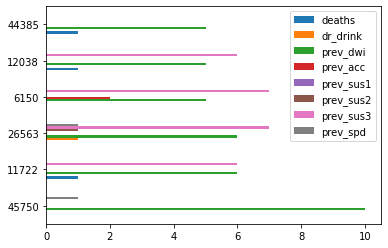

In [17]:
# (1,98) are values with prior violations/DWI

df_vehicle.loc[ ( df_vehicle["prev_dwi"] > 4 ) & (df_vehicle["prev_dwi"] < 99 ) ][["deaths", "dr_drink", "prev_dwi","prev_acc", "prev_sus1",  
                                                                        "prev_sus2", "prev_sus3", "prev_spd"  ]].sort_values(by = "prev_dwi", ascending = False).plot(kind="barh")
#df_vehicle.loc[ ( df_vehicle["prev_dwi"] > 1 ) & (df_vehicle["prev_dwi"] < 99 ) ][["deaths", "dr_drink", "prev_dwi","prev_acc", "prev_sus1",  
#                                                                        "prev_sus2", "prev_sus3", "prev_spd"  ]].sort_values(by = "prev_dwi", ascending = False).plot(kind="barh")


#1739 drivers had prev dwi convictions in past 5 years; ; 294 had more than 1 prior DWI; 52 had more than 2(44 deaths, ); 18 more than 3, 14 deaths; 852 drinking drivers; 1358 deaths 


#df_vehicle.loc[ ( df_vehicle["prev_dwi"] > 0 ) & (df_vehicle["prev_dwi"] < 99 ) ][["deaths", "dr_drink", "prev_acc", "prev_sus1", "prev_dwi" ]].sum().plot(kind="barh")




In [18]:
# Playing around...
mask = (df_vehicle["p_crash2"] >= 90) & (df_vehicle["p_crash2"] <= 92) 

# animal is critical event: 237 incidents
#mask = (df_vehicle["p_crash2"] == 87) | (df_vehicle["p_crash2"] == 88) | (df_vehicle["p_crash2"] == 89)

df_vehicle[mask][cols_main_names].value_counts()

vtrafway  vnum_lan  vspd_lim  valign  vprofile  vpavetyp  vsurcond  vtrafcon  vtcont_f  p_crash1  p_crash2  p_crash2name             p_crash3  pcrash4  pcrash5  acc_type  acc_typename                                    
3         3         60        1       1         8         1         0         0         1         90        Object in road           99        1        1        98        M98-Other Crash Type                                4
2         5         45        1       1         2         1         3         3         5         91        Object approaching road  1         1        1        98        M98-Other Crash Type                                4
          3         45        1       1         2         1         0         0         1         90        Object in road           99        1        1        98        M98-Other Crash Type                                4
1         2         55        1       1         8         1         0         0         1         90     

In [20]:
df_vehicle[["p_crash2", "p_crash2name"]].head(10)

,p_crash2,p_crash2name
0,13,Off the edge of the road on the right side
1,15,Turning Left
2,62,From opposite direction over left lane line
3,62,From opposite direction over left lane line
4,62,From opposite direction over left lane line
5,13,Off the edge of the road on the right side
6,66,"From crossing street, across path"
7,12,Off the edge of the road on the left side
8,12,Off the edge of the road on the left side
9,10,Over the lane line on left side of travel lane


In [21]:
# Create categories for Pre-crash crit events. 
# This categorical data is much more meaningful (and useful) for modeling. 


''' Values and descriptions of the categories (matches the Manuals)
1 This Vehicle Loss of Control Due to:
2 This Vehicle Traveling
3 Other Motor Vehicle in Lane
4 Other Motor Vehicle Encroaching into Lane
5 Pedestrian or Pedalcyclist or Other Non-Motorist
6 Object or Animal
7 Other
9 Unknown
'''

for i in range( df_vehicle.shape[0]):
    e = df_vehicle.loc[i, 'p_crash2']
    
    #print( {i}, {e})
    if e >=1 and e <= 9:
        df_vehicle.loc[i, 'crit_event_category'] = 1
        df_vehicle.loc[i, 'crit_event_cat_name'] = "This lost control"
    elif e >=10 and e <= 21: 
        df_vehicle.loc[i, 'crit_event_category'] = 2
        df_vehicle.loc[i, 'crit_event_cat_name'] = "This traveling"
    elif e >=50 and e <= 59: 
        df_vehicle.loc[i, 'crit_event_category'] = 3
        df_vehicle.loc[i, 'crit_event_cat_name'] = "Other Motor Vehicle in Lane"
    elif e >=60 and e <= 78: 
        df_vehicle.loc[i, 'crit_event_category'] = 4
        df_vehicle.loc[i, 'crit_event_cat_name'] = "Other Motor Vehicle Encroaching into Lane"
    elif e >=80 and e <= 85: 
        df_vehicle.loc[i, 'crit_event_category'] = 5
        df_vehicle.loc[i, 'crit_event_cat_name'] = "Pedestrian or Pedalcyclist or Other Non-Motorist"
    elif e >=87 and e <= 92: 
        df_vehicle.loc[i, 'crit_event_category'] = 6
        df_vehicle.loc[i, 'crit_event_cat_name'] = "Object or Animal"
    elif e == 98: 
        df_vehicle.loc[i, 'crit_event_category'] = 7
        df_vehicle.loc[i, 'crit_event_cat_name'] = "Other"
    else: #e == 99: 
        df_vehicle.loc[i, 'crit_event_category'] = 9
        df_vehicle.loc[i, 'crit_event_cat_name'] = "Unknown"
    #print( i, e, df_vehicle.loc[i, 'crit_event_category'], df_vehicle.loc[i, 'crit_event_cat_name'])
        
# This takes a minute to run, even for 54k records

In [22]:
# Check the mapping from event to category is done properly
#df_vehicle[["crit_event_category", "p_crash2"]].head(20)
df_vehicle[["p_crash2", "crit_event_cat_name", "crit_event_category"]].head(20)


,p_crash2,crit_event_cat_name,crit_event_category
0,13,This traveling,2.0
1,15,This traveling,2.0
2,62,Other Motor Vehicle Encroaching into Lane,4.0
3,62,Other Motor Vehicle Encroaching into Lane,4.0
4,62,Other Motor Vehicle Encroaching into Lane,4.0
5,13,This traveling,2.0
6,66,Other Motor Vehicle Encroaching into Lane,4.0
7,12,This traveling,2.0
8,12,This traveling,2.0
9,10,This traveling,2.0


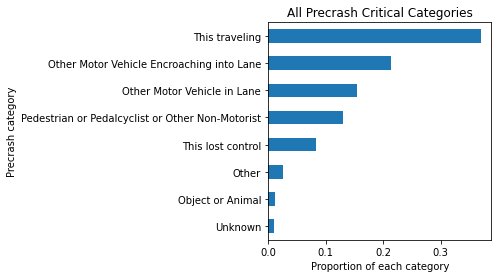

In [23]:
# Plot the critical categories

plt.figure( figsize=(4,4));

df_vehicle["crit_event_cat_name"].value_counts(normalize = True, ascending=True).plot(kind="barh", title="All Precrash Critical Categories");
plt.xlabel("Proportion of each category");
plt.ylabel("Precrash category");


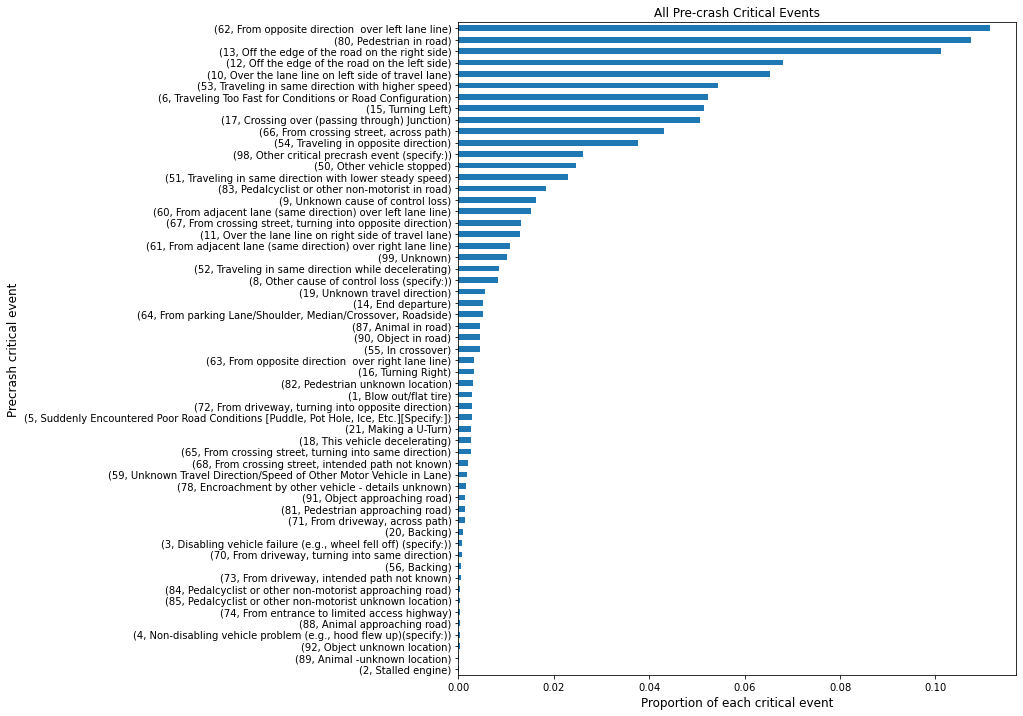

In [25]:
# Plot all the Precrash events. Showing both the event code and number for easier comparison

plt.figure( figsize=(10,12))
df_vehicle[["p_crash2", "p_crash2name"]].value_counts(normalize=True, ascending=True).plot(kind="barh",
                                                                title="All Pre-crash Critical Events");
plt.xlabel("Proportion of each critical event", fontsize=12);
plt.ylabel("Precrash critical event", fontsize=12);


In [26]:
df_vehicle["vsurcond"].describe()

count    54272.000000
mean         3.041126
std         13.238901
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         99.000000
Name: vsurcond, dtype: float64

In [27]:
df_vehicle[["vsurcond", "vsurcondname"]].value_counts(normalize=True)*100

# This might be interesting for further deep dive. Wet conditions: 11%, Entering a trafficway or was in Driveway: 0.8%, Ice 0.6%, 


vsurcond  vsurcondname                     
1         Dry                                  83.833284
2         Wet                                  11.499484
98        Not Reported                          1.488797
0         Non-Trafficway or Driveway Access     0.790463
4         Ice/Frost                             0.663325
3         Snow                                  0.495652
99        Reported as Unknown                   0.401680
11        Mud, Dirt or Gravel                   0.322450
6         Water (Standing or Moving)            0.195312
10        Slush                                 0.175044
8         Other                                 0.105027
5         Sand                                  0.022111
7         Oil                                   0.007370
dtype: float64

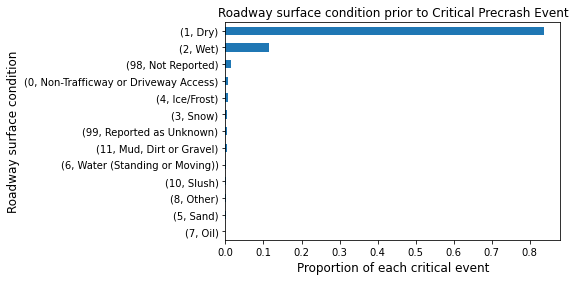

In [28]:
# Plot all the roadway surface conditions. Showing both the event code and number for easier comparison

plt.figure( figsize=(6,4))
df_vehicle[["vsurcond", "vsurcondname"]].value_counts(normalize=True, ascending=True).plot(kind="barh",
                                                                title="Roadway surface condition prior to Critical Precrash Event");
plt.xlabel("Proportion of each critical event", fontsize=12);
plt.ylabel("Roadway surface condition", fontsize=12);


In [29]:
# Now check if drivers vison was obscured from vision df
df_vision.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54325 entries, 0 to 54324
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   state       54325 non-null  int64 
 1   statename   54325 non-null  object
 2   st_case     54325 non-null  int64 
 3   veh_no      54325 non-null  int64 
 4   vision      54325 non-null  int64 
 5   visionname  54325 non-null  object
dtypes: int64(4), object(2)
memory usage: 2.5+ MB


In [30]:
df_vision[["vision", "visionname"]].value_counts(normalize=True)*100

vision  visionname                                      
0       No Obstruction Noted                                93.087897
99      Reported as Unknown                                  3.350207
1       Rain, Snow, Fog, Smoke, Sand, Dust                   0.727105
95      No Driver Present/Unknown if Driver present          0.642430
98      Other Visual Obstruction                             0.539347
2       Reflected Glare, Bright Sunlight, Headlights         0.416015
6       In-Transport Motor Vehicle (including load)          0.410492
3       Curve, Hill or Other Roadway Design Feature          0.283479
97      Vision Obscured - No Details                         0.165670
5       Trees, Crops, Vegetation                             0.145421
7       Not In-Transport Motor Vehicle (parked, working)     0.104924
4       Building, Billboard, Other Structure                 0.040497
11      Obstruction Interior to the Vehicle                  0.018408
13      Broken or Improperly Clea

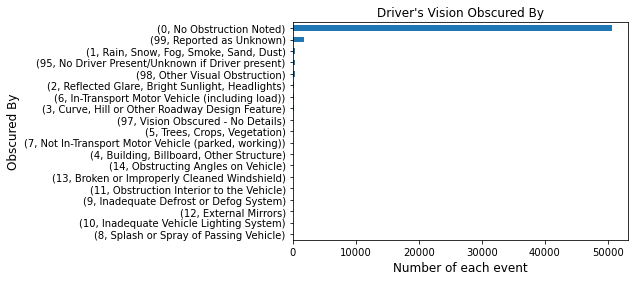

In [31]:
# Plot. Showing both the event code and number for easier comparison

plt.figure( figsize=(6,4))
df_vision[["vision", "visionname"]].value_counts( ascending=True).plot(kind="barh",
                                                                title="Driver's Vision Obscured By");
plt.xlabel("Number of each event", fontsize=12);
plt.ylabel("Obscured By", fontsize=12);


In [15]:
# Check if Driver was distracted 
df_distract[["drdistract", "drdistractname"]].value_counts(normalize=True)*100

drdistract  drdistractname                                                
96          Not Reported                                                      48.348713
0           Not Distracted                                                    31.688493
99          Reported as Unknown if Distracted                                 13.816286
93          Inattention (Inattentive), Details Unknown                         2.120057
92          Distraction (Distracted), Details Unknown                          1.007533
16          No Driver Present/Unknown if Driver present                        0.642832
12          Distracted by Outside Person, Object or Event                      0.443904
17          Distraction/Inattention                                            0.335231
15          Other Mobile Phone Related                                         0.257870
3           By Other Occupant(s)                                               0.248660
98          Other Distraction [Specify:]     

In [16]:
# The thing(s) the driver attempted to avoid while the vehicle was on the road portion of the trafficway, 
# just prior to the first harmful event for this vehicle.
#PC15. Maneuver.MANEUVER

df_maneuver[["maneuver", "maneuvername"]].value_counts(normalize=True)*100


maneuver  maneuvername                                     
98        Not Reported                                         64.089385
0         Driver Did Not Maneuver to Avoid                     22.309421
4         Contact Motor Vehicle (In this crash)                 6.536237
99        Reported as Unknown                                   2.910725
5         Pedestrian, Pedalcyclist or Other Non-Motorist        1.860654
92        Phantom/Non-Contact Motor Vehicle                     1.197450
95        No Driver Present/Unknown if Driver present           0.642939
3         Live Animal                                           0.237648
1         Object                                                0.163959
2         Poor Road Conditions (Puddle, Ice, Pothole, etc.)     0.051582
dtype: float64

In [38]:
# PC4 - Contributing Circumstances, Motor Vehicle
# Factor.VEHICLECC

df_factor[["vehiclecc", "vehicleccname"]].value_counts(normalize=True)*100

# Tires contribute 1.1% to all fatal accidents!

vehiclecc  vehicleccname                             
0          None Noted                                    92.042611
99         Reported as Unknown                            5.720121
1          Tires                                          1.107595
97         Other                                          0.283338
2          Brake System                                   0.228142
7          Head Lights                                    0.141669
17         Vehicle Contributing Factors - No Details      0.075434
9          Other Lights                                   0.075434
5          Power Train                                    0.057036
3          Steering                                       0.057036
8          Signal Lights                                  0.033117
16         Safety Systems                                 0.033117
15         Truck Coupling/Trailer Hitch/Safety Chains     0.031278
13         Windows/Windshield                             0.029438
11      

In [39]:
# How does the weather in the weather.csv differ from the Driver's Vision Obscured By and Roadway Surface Conditions? 

df_weather[["weather", "weathername"]].value_counts(normalize=True)*100

weather  weathername             
1        Clear                       69.126606
10       Cloudy                      13.602127
2        Rain                         7.313358
98       Not Reported                 6.814909
5        Fog, Smog, Smoke             1.052282
4        Snow                         0.783673
99       Reported as Unknown          0.722751
6        Severe Crosswinds            0.177226
12       Freezing Rain or Drizzle     0.119074
11       Blowing Snow                 0.113536
3        Sleet or Hail                0.088613
8        Other                        0.060922
7        Blowing Sand, Soil, Dirt     0.024922
dtype: float64

### Now let's look at accident data

In [40]:
# number of fatals. None of the records have zero fatals - i.e. the dataset ONLY contains accidents with at least one fatality
df_accident['fatals'].value_counts()

1     331008
2      21264
3       3061
4        796
5        225
6         56
7         16
8          8
9          3
10         2
13         2
15         2
11         1
20         1
Name: fatals, dtype: int64

In [43]:
# Construction/Work zones 
df_accident[["wrk_zone", "wrk_zonename"]].value_counts(normalize=True)*100

wrk_zone  wrk_zonename           
0         None                       97.914817
1         Construction                1.293545
4         Work Zone, Type Unknown     0.617507
2         Maintenance                 0.145841
3         Utility                     0.028290
dtype: float64

In [44]:
#LGT_COND
df_accident[["lgt_cond", "lgt_condname"]].value_counts(normalize=True)*100

lgt_cond  lgt_condname           
1         Daylight                   46.997337
2         Dark - Not Lighted         27.514169
3         Dark - Lighted             19.843136
5         Dusk                        2.403204
4         Dawn                        1.908613
6         Dark - Unknown Lighting     0.736521
9         Reported as Unknown         0.242418
          Unknown                     0.205348
8         Not Reported                0.105844
7         Other                       0.043411
dtype: float64

In [45]:
#WEATHER
df_accident[["weather", "weathername"]].value_counts(normalize=True)*100

weather  weathername             
1        Clear                       69.379274
10       Cloudy                      14.565550
2        Rain                         7.377889
98       Not Reported                 5.479031
5        Fog, Smog, Smoke             1.116000
4        Snow                         0.972598
99       Reported as Unknown          0.274610
         Unknown                      0.228760
3        Sleet or Hail                0.172668
6        Severe Crosswinds            0.141939
8        Other                        0.113649
12       Freezing Rain or Drizzle     0.077066
11       Blowing Snow                 0.069262
7        Blowing Sand, Soil, Dirt     0.031705
dtype: float64

In [46]:
#"REL_ROAD", "REL_ROADNAME"
df_accident[["rel_road", "rel_roadname"]].value_counts(normalize=True)*100

rel_road  rel_roadname                              
1         On Roadway                                    61.368270
4         On Roadside                                   29.582768
3         On Median                                      3.761621
5         Outside Trafficway                             2.134447
2         On Shoulder                                    1.485723
8         Gore                                           0.463374
6         Off Roadway-Location Unknown                   0.298023
10        Separator                                      0.283390
7         In Parking Lane/Zone                           0.257538
99        Reported as Unknown                            0.107308
11        Continuous Left - Turn Lane                    0.077554
99        Unknown                                        0.073652
98        Not Reported                                   0.062921
12        Pedestrian Refuge Island or Traffic Island     0.043411
dtype: float64

In [47]:
# accidents per hour. No manior standouts here. Hence we will break this up into chunks of multiple hours. 
df_accident['hour'].value_counts(normalize=True)

18    0.057585
20    0.055568
17    0.055405
21    0.054721
19    0.054387
16    0.051814
15    0.051051
22    0.048100
14    0.046394
23    0.043693
13    0.042857
12    0.039336
0     0.039097
2     0.038943
1     0.037206
6     0.036525
11    0.035526
7     0.033753
10    0.031256
5     0.030204
3     0.028591
9     0.028072
8     0.027996
4     0.024481
99    0.007440
Name: hour, dtype: float64

'2010-1-15 4:10'

2010-1-15 4:10
2010-01-15 04:10:00


In [17]:
# Create datetime column. 
# This is the timeseries index used in modeling 

# Unfortunately, we cannot use the standard pd.to_datetime functions since the FARS data has values of 98 and 99 which are considered 
# valid values and mess up the calculations. 
# df_accident["date_time"] = pd.to_datetime(df_accident[["year", "month", "day", "hour", "minute"]], errors='coerce')

# If hour = 99 or minute = 99 -> set to NaT, equivalent of NaN. We'll drop these rows later
for i in range (df_accident.shape[0]) :
    d = df_accident.iloc[i]
    if (d['hour'] < 99) & (d['minute'] < 99): # valid values
        dt = str(d["year"]) + "-" + str( d["month"]) + "-" + str( d["day"]) + " " + str( d["hour"]) + ":" + str( d["minute"]) 
        #print( i, dt )
        df_accident.loc[i, "date_time"] = pd.to_datetime(dt)
    else:
        # don't create an entry if invalid hour or minute??
        df_accident.loc[i, "date_time"] = pd.NaT # NaT is the equivalent of NaN for datetime
        #print( i, d )
    
    
# takes 10 minutes   for 10 years

In [51]:
# confirm done ok
df_accident[['year', "month", "day", "hour", "minute", "date_time"]]

,year,month,day,hour,minute,date_time
0,2010,1,15,4,10,2010-01-15 04:10:00
1,2010,1,11,6,0,2010-01-11 06:00:00
2,2010,1,14,15,10,2010-01-14 15:10:00
3,2010,1,21,1,16,2010-01-21 01:16:00
4,2010,1,4,6,38,2010-01-04 06:38:00
...,...,...,...,...,...,...
356440,2020,12,12,16,36,2020-12-12 16:36:00
356441,2020,12,18,18,6,2020-12-18 18:06:00
356442,2020,12,11,17,30,2020-12-11 17:30:00
356443,2020,12,15,20,21,2020-12-15 20:21:00


In [52]:
df_accident["date_time"].isnull().sum() # 315 have null (NaT) in 2020; 787 in 2018-2020; 2618 in 10 years. 
# Less than 1% so can drop these rows

2681

In [53]:
# Drop the nulls first before using this as the index. (Keep the nonnulls)
df_accident = df_accident.loc[df_accident["date_time"].notnull()]


In [54]:
# confirm no nulls for date_time
df_accident.isnull().sum()

year                 0
month                0
monthname       150299
day                  0
day_week             0
day_weekname    150299
hour                 0
hourname        150299
minute               0
state                0
statename       150299
county               0
countyname      182586
st_case              0
ve_total             0
ve_forms             0
pvh_invl         30075
peds                 0
persons              0
city                 0
cityname        182586
latitude             0
longitud             0
harm_ev              0
harm_evname     150299
man_coll             0
man_collname    150299
wrk_zone             0
wrk_zonename    150299
rel_road             0
rel_roadname    150299
lgt_cond             0
lgt_condname    150299
weather              0
weathername     150299
sch_bus              0
sch_busname     150299
not_hour             0
not_hourname    150299
not_min              0
not_minname     150299
arr_hour             0
arr_hourname    150299
arr_min    

In [55]:
df_accident["date_time"].isnull().sum() # finally, no nulls in date_time column

0

In [18]:
# Set this new date_time column to the index (for lag, ACF, PACF plots for trend and seasonality, and for the time series modeling for AR and RNN)

df_accident = df_accident.set_index( "date_time")


In [20]:
# Check info and make sure DatetimeIndex: 356445 entries, 2010-01-15 04:10:00 to 2020-12-24 09:25:00
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 356445 entries, 2010-01-15 04:10:00 to 2020-12-24 09:25:00
Data columns (total 92 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   state         356445 non-null  int64  
 1   st_case       356445 non-null  int64  
 2   ve_total      356445 non-null  int64  
 3   ve_forms      356445 non-null  int64  
 4   peds          356445 non-null  int64  
 5   persons       356445 non-null  int64  
 6   county        356445 non-null  int64  
 7   city          356445 non-null  int64  
 8   day           356445 non-null  int64  
 9   month         356445 non-null  int64  
 10  year          356445 non-null  int64  
 11  day_week      356445 non-null  int64  
 12  hour          356445 non-null  int64  
 13  minute        356445 non-null  int64  
 14  nhs           356445 non-null  int64  
 15  road_fnc      151427 non-null  float64
 16  route         356445 non-null  int64  
 17  tway_id       

In [58]:
# Create a new column, which has the Day+hour with most accidents

# Sun=1; Sat=7; 
# hour//3 for 3 hour window; 
# 3 hour window: 8 buckets of 3 hours each in a day; 7 days; buckets: 1 to 56
# 2 hour window: 12 buckets of 2 hours each in a day; 7 days; buckets: 1 to 84
# 4 hour window: 6 buckets of 4 hours each in a day; 7 days; buckets: 1 to 42

# Create columns for 3 hour window and its name (for graphs)
# Create 2 or 4 hour windows too 

# 3 hour window
df_accident["day_3hr_window"] = ((df_accident["day_week"]-1) * 8) + ( df_accident["hour"]//3) + 1 # starting from 1
df_accident["day_3hr_window_name"] = df_accident["day_weekname"] + " " + (( df_accident["hour"]//3)*3).astype(str) + ":00 to " + ((( df_accident["hour"]//3)*3)+3).astype(str) + ":00"

# 2 hour window
df_accident["day_2hr_window"] = ((df_accident["day_week"]-1) * 12) + ( df_accident["hour"]//2) + 1 # starting from 1
df_accident["day_2hr_window_name"] = df_accident["day_weekname"] + " " + (( df_accident["hour"]//2)*2).astype(str) + ":00 to " + ((( df_accident["hour"]//2)*2)+2).astype(str) + ":00"

# 4 hour window
df_accident["day_4hr_window"] = ((df_accident["day_week"]-1) * 6) + ( df_accident["hour"]//4) + 1 # starting from 1
df_accident["day_4hr_window_name"] = df_accident["day_weekname"] + " " + (( df_accident["hour"]//4)*4).astype(str) + ":00 to " + ((( df_accident["hour"]//4)*4)+4).astype(str) + ":00"



df_accident[["day_week", "hour", "day_weekname", "day_2hr_window", "day_2hr_window_name", "day_3hr_window", "day_3hr_window_name", "day_4hr_window", "day_4hr_window_name"]]


,day_week,hour,day_weekname,day_2hr_window,day_2hr_window_name,day_3hr_window,day_3hr_window_name,day_4hr_window,day_4hr_window_name
date_time,,,,,,,,,
2010-01-15 04:10:00,6,4,NaN,63,NaN,42,NaN,32,NaN
2010-01-11 06:00:00,2,6,NaN,16,NaN,11,NaN,8,NaN
2010-01-14 15:10:00,5,15,NaN,56,NaN,38,NaN,28,NaN
2010-01-21 01:16:00,5,1,NaN,49,NaN,33,NaN,25,NaN
2010-01-04 06:38:00,2,6,NaN,16,NaN,11,NaN,8,NaN
...,...,...,...,...,...,...,...,...,...
2020-12-12 16:36:00,7,16,Saturday,81,Saturday 16:00 to 18:00,54,Saturday 15:00 to 18:00,41,Saturday 16:00 to 20:00
2020-12-18 18:06:00,6,18,Friday,70,Friday 18:00 to 20:00,47,Friday 18:00 to 21:00,35,Friday 16:00 to 20:00
2020-12-11 17:30:00,6,17,Friday,69,Friday 16:00 to 18:00,46,Friday 15:00 to 18:00,35,Friday 16:00 to 20:00


In [ ]:
# Check looks good for Sunday since calcualtion check is easier 
df_accident[(df_accident['day_week'] == 1)][["day_week", "hour", "day_weekname", "day_2hr_window", "day_2hr_window_name", "day_3hr_window", "day_3hr_window_name", "day_4hr_window", "day_4hr_window_name"]].head()



,day_week,hour,day_weekname,day_2hr_window,day_2hr_window_name,day_3hr_window,day_3hr_window_name,day_4hr_window,day_4hr_window_name
date_time,,,,,,,,,
2010-01-03 13:50:00,1,13,NaN,7,NaN,5,NaN,4,NaN
2010-01-10 04:37:00,1,4,NaN,3,NaN,2,NaN,2,NaN
2010-01-17 21:35:00,1,21,NaN,11,NaN,8,NaN,6,NaN
2010-01-10 21:55:00,1,21,NaN,11,NaN,8,NaN,6,NaN
2010-01-17 01:20:00,1,1,NaN,1,NaN,1,NaN,1,NaN


In [ ]:
# Check looks good for all days
df_accident[["day_week", "hour", "day_weekname", "day_2hr_window", "day_2hr_window_name", "day_3hr_window", "day_3hr_window_name", "day_4hr_window", "day_4hr_window_name"]].head()

,day_week,hour,day_weekname,day_2hr_window,day_2hr_window_name,day_3hr_window,day_3hr_window_name,day_4hr_window,day_4hr_window_name
date_time,,,,,,,,,
2010-01-15 04:10:00,6,4,NaN,63,NaN,42,NaN,32,NaN
2010-01-11 06:00:00,2,6,NaN,16,NaN,11,NaN,8,NaN
2010-01-14 15:10:00,5,15,NaN,56,NaN,38,NaN,28,NaN
2010-01-21 01:16:00,5,1,NaN,49,NaN,33,NaN,25,NaN
2010-01-04 06:38:00,2,6,NaN,16,NaN,11,NaN,8,NaN


In [ ]:
# Save the file (with date_time as index) for use in next notebook 

df_accident.to_csv("./data/accident_ts_10years.csv" )

### We're done with this file!! The next notebook has the EDA and seasonality, trends checks...
